In [ ]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [ ]:
MNIST_dataset=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_training,Y_training),(X_testing,Y_testing)=MNIST_dataset #splitting the dataset into training and testing data

In [ ]:
X_training.shape

(60000, 28, 28)

In [ ]:
X_testing.shape

(10000, 28, 28)

In [ ]:
a=random.randint(0,X_training.shape[0]) #Picking up a random image from the training set and visualizing each pixel of it in the form of a Numpy array.
X_training[a]   #The values range from 0 to 255, with 0 representing 'Black' and 255 "White"

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         94, 214, 250, 130,  63,  63, 127, 109,  38,   0,   0,   0,   0,
          0,   0],
       [  

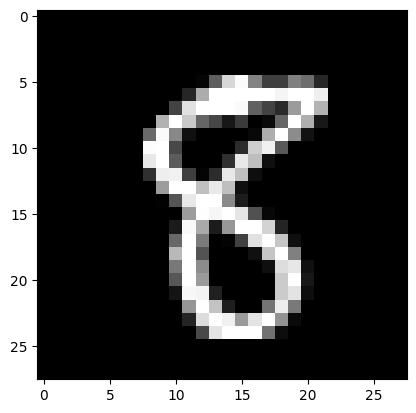

In [ ]:
plt.imshow(X_training[a],cmap='gray') #Image corresponding to the above array

In [ ]:
'''
Function for generating 10000 random numbers
'''
def generate_random_numbers(low, high, n):
    return random.sample(range(low, high), n)

In [ ]:
rnd_int_arr=generate_random_numbers(0,60000,10000)

In [ ]:
rnd_int_arr

[4550,
 49040,
 40015,
 46478,
 13334,
 26542,
 11129,
 47827,
 17527,
 19242,
 25138,
 5611,
 7468,
 16902,
 38350,
 47907,
 47424,
 42601,
 27558,
 27900,
 45881,
 17726,
 23458,
 38401,
 36291,
 6260,
 22842,
 40148,
 19136,
 20464,
 5396,
 48325,
 6854,
 13753,
 56143,
 34845,
 33923,
 36809,
 40170,
 30868,
 41720,
 44846,
 29826,
 33860,
 9535,
 4924,
 9513,
 46343,
 55104,
 5559,
 15688,
 49572,
 34602,
 2215,
 59921,
 53828,
 2193,
 32655,
 56707,
 47729,
 28795,
 46011,
 51658,
 21184,
 5235,
 12373,
 17346,
 21702,
 58151,
 55422,
 12945,
 40383,
 566,
 39935,
 6649,
 3579,
 57978,
 56504,
 44740,
 42210,
 1386,
 44480,
 17243,
 6179,
 41752,
 47349,
 18124,
 59132,
 52335,
 159,
 47931,
 1302,
 4055,
 10189,
 24857,
 2707,
 26271,
 24613,
 32026,
 33598,
 27519,
 52745,
 16206,
 25348,
 58087,
 47701,
 9766,
 18235,
 26085,
 13059,
 4004,
 38851,
 38966,
 35790,
 33891,
 49759,
 19158,
 16007,
 30623,
 58073,
 12963,
 4943,
 23759,
 35793,
 28513,
 15669,
 36721,
 50167,
 16

In [ ]:
len(set(rnd_int_arr)) #This shows that there are no repititions of numbers in the random 10000 integer's list

10000

In [ ]:
X_Train_New=np.reshape(X_training,(60000,784)) #Reshaping the X_training

In [ ]:
X_matrix_for_PCA=np.zeros((10000,784))

In [ ]:
len(X_matrix_for_PCA[:,2])

10000

In [ ]:
'''
Stacking the 10000 images in a matrix such that each row represents a single image.
The dimension of the matrix is (10000,(28*28))
'''
for i in range(10000):
  for j in range(28*28):
    X_matrix_for_PCA[i][j]=X_Train_New[rnd_int_arr[i]][j]

In [ ]:
len(X_matrix_for_PCA[8,:])

784

In [ ]:
#Function for Standardization of the Matrix
#for each of the column entry if average is "mu" and standard deviation is "sigma", then I have standardized each entry x as (x-mu)/sigma
import math
def Standardize(X):
  mean_list=[]
  r=X.shape[0]
  c=X.shape[1]
  Z=np.zeros((r,c))
  for i in range(r):
    for j in range(c):
      Z[i][j]=X[i][j]
  for i in range(c):
    sum=0
    for j in range(r):
      sum=sum+X[j][i]
    avg=sum/10000
    mean_list.append(avg)


  Z=Z-mean_list
  std_list=[]
  for i in range(c):
    sum1=0
    for j in range(r):
      sum1=sum1+math.pow((Z[j][i]),2)
    sum1=sum1/(10000-1)
    std_list.append(sum1)

  for i in range(c):
    if(std_list[i]!=0):
      for j in range(r):
        Z[j][i]=Z[j][i]/math.sqrt(std_list[i])

  return Z,mean_list


In [ ]:
Z,mean_list=Standardize(X_matrix_for_PCA) #mean_list contains the average values of the columns of X_matrix_for_PCA before standardization.


In [ ]:
Z1=Z.transpose()
Z2=np.dot(Z1,Z)
Z2
Cov_matrix=(1/(10000-1))*Z2
Eig_vals,Eig_vectors=np.linalg.eig(Cov_matrix) #Using numpy's Linear Algebra Library to calculate Eigen values and Eigen vectors
#Eig_vals

In [ ]:
Eig_vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
'''
There can be some eigen values which may not be real numbers. I have removed these eigen values and the eigen vectors corresponding to it.
'''
Eig_vals
Real_Eig_Vals=[]
for val in Eig_vals:
  if(np.iscomplex(val)==False):
    Real_Eig_Vals.append(val)

len(Real_Eig_Vals)



784

In [ ]:
Eig_vectors.shape

(784, 784)

In [ ]:
'''
I have created a Dictionary(Eigen_Dict) to store the eigen values as key and its corresponding eigen vector as value.
Creating this dictionary will help me in sorting the eigen values and maintaining the order of its corresponding eigen vector at the same time.
'''
Eigen_Dict={}
for i in range(784):
  Eigen_Dict[Eig_vals[i]]=Eig_vectors[:,i]

In [ ]:
Eigen_Dict.keys()

dict_keys([41.46395049847787, 29.331024534414972, 27.31317372894257, 20.754263599062025, 17.93791485429539, 15.86222635932809, 13.591402428874735, 12.621105118446986, 11.169348870819817, 10.038222578575258, 9.556157701754532, 8.741139201484499, 8.127330327792555, 7.850668640329478, 7.540471504257434, 7.001538604166115, 6.789872910784642, 6.631544263850326, 6.548079932390896, 6.172206507202772, 5.889815767265158, 5.694462586159053, 5.575099426854892, 5.318819583843857, 5.241212963019007, 5.108474565308526, 4.911719194222565, 4.832043873072146, 4.737020082363638, 4.623416338882529, 4.454498443732549, 4.299717304261151, 4.223583687080077, 4.17492049578432, 4.053170773657249, 4.0088919048678715, 3.8217004518943103, 3.7629827963341502, 3.762744033049233, 3.6793409533861627, 3.5664793155210472, 3.4601624705601632, 3.4463763633919315, 3.329365143754183, 3.289174532920912, 3.2623947372465403, 3.1944809838126247, 3.147619662285949, 3.1052981868284038, 3.086353670040015, 3.029545264438809, 2.970

In [ ]:
Real_Eig_Vals.sort()
len(Real_Eig_Vals)

784

In [ ]:
'''
Final Eigen vectors after removal of the Eigen Vector corresponding to an imaginary eigen value(if any)
'''
Eig_vector_final=np.zeros((784,len(Real_Eig_Vals)))

In [ ]:
for i in range(len(Real_Eig_Vals)):
  for j in range(784):
    Eig_vector_final[j][i]=Eigen_Dict[Real_Eig_Vals[i]][j]

In [ ]:
Eig_vector_final[100]

array([-3.29585357e-15, -1.06344400e-15,  1.36091184e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
'''
Creating the Projection Matrix(P).It can be created the reversing the above matrix(Eig_vector_final) by its Columns.
So, the last column of "Eig_vector_final" will be the 1st column of P, and so on...
'''
P=np.zeros((784,len(Real_Eig_Vals)))
for i in range(784):
  for j in range(len(Real_Eig_Vals)):
    P[i][len(Real_Eig_Vals)-j-1]=Eig_vector_final[i][j]



Just to verify my work. I have randomly picked up a Column(say 50) from the matrix "P" and corresondingly (len(Real_Eig_Vals)-50-1) from the matrix Eig_vector_final and found that both are the same.

In [ ]:
P[:,50]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.49224071e-02,
       -1.50284902e-02, -9.17202924e-03,  6.95365526e-03,  1.39364119e-03,
       -1.87980519e-02, -2.68295117e-02, -2.08039761e-02, -7.80653405e-04,
        2.56357590e-02,  2.71654256e-02,  1.68079655e-02,  3.83321920e-03,
       -7.46613869e-03, -7.46613869e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
Eig_vector_final[:,len(Real_Eig_Vals)-50-1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.49224071e-02,
       -1.50284902e-02, -9.17202924e-03,  6.95365526e-03,  1.39364119e-03,
       -1.87980519e-02, -2.68295117e-02, -2.08039761e-02, -7.80653405e-04,
        2.56357590e-02,  2.71654256e-02,  1.68079655e-02,  3.83321920e-03,
       -7.46613869e-03, -7.46613869e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
'''
The New K-dimensional Matrix is formed by selecting the 1st K columns from the matrix "P" and multiplying it with the original Standardized matrix Z.
'''
def create_matrix_from_P(Z,P,columns):
  #columns:denotes the no.of columns we should select from Matrix P
  r=P.shape[0]
  c=P.shape[1]
  P_bar=np.zeros((r,columns))
  for i in range(columns):
    for j in range(r):
      P_bar[j][i]=P[j][i]

  P_result=np.dot(Z,P_bar)
  return P_result


def reconstruction(P_result,mean_list,P,K):
  '''
  P_result:The reduced k-dimensional matrix
  mean_list:The array(or list) containing the column(feature) average of matrix X_matrix_for_PCA(before standardization)
  P:Projection Matrix
  K:Dimension of transformed matrix/No.of columns in Transformed matrix
  '''
  reconstructed_matrix=np.zeros((10000,784))
  for i in range(K):
    reconstructed_matrix=np.dot(P_result[:,i].reshape((10000,1)),(P[:,i]).reshape((1,784)))+reconstructed_matrix
  reconstructed_matrix=mean_list+reconstructed_matrix

  return reconstructed_matrix


def calculate_reconstruction_error(X_matrix_for_PCA,reconstructed_matrix):
  '''
  Here I have used L2 norm to calculate the reconstruction error using the matrices X_matrix_for_PCA and reconstructed_matrix.
  '''
  sum=0
  for i in range(10000):
    sum1=0
    for j in range(784):
      sum1=sum1+(X_matrix_for_PCA[i][j]-reconstructed_matrix[i][j])**2
    sum=sum+math.sqrt(sum1)

  sum=sum/10000
  return sum






In [ ]:
'''
In this cell, I have varied the chosen no.of Principal components from 24 to 784 with a jump of 20
'''
Transformed_matrix_dict={} #This dictionary stores all the Transformed matrices with no.of Principal components ranging from 24 to 784 with a jump of 20
Reconstructed_matrix_dict={} #This dictionary stores all the Reconstructed matrices against no.of Principal components from 24 to 784
Reconstruction_error_dict={} #This dictionary consists of all the Reconstruction errors for each of the Principal component values.
for i in range(24,785,20):
  Transformed_matrix_dict[i]=create_matrix_from_P(Z,P,i)
  Reconstructed_matrix_dict[i]=reconstruction(Transformed_matrix_dict[i],mean_list,P,i)
  Reconstruction_error_dict[i]=calculate_reconstruction_error(X_matrix_for_PCA,Reconstructed_matrix_dict[i])




The above cell is taking about 20 minutes to run. This is because it is computing a lot of information in the form of the complete Transformed matrices(with reduced dimensions), the reconstructed matrices and the reconstruction errors for all the Principal Components from 24 to 784(with a jump of 20). I have done this extra work for my satisfaction and learning purpose. I will be able to visualize all the required information any time I want(any row,column of any of the matrix)as I have stored all these information in the form of a dictionary. If I just provide the no.of Principal components(key of dictionary), I will be able to derive any information.

In [ ]:
Reconstruction_error_dict #Keys represent the no.of Principal Components and values represents the reconstruction error corresponding to each PC

{24: 1828.9673457136237,
 44: 1826.9211942342165,
 64: 1825.7954169400684,
 84: 1824.9700161644028,
 104: 1824.2938159133394,
 124: 1823.7178486663572,
 144: 1823.3130981178995,
 164: 1822.9152290393774,
 184: 1822.574307174573,
 204: 1822.269540808246,
 224: 1822.02477536855,
 244: 1821.8092859661858,
 264: 1821.6231450458818,
 284: 1821.468334667855,
 304: 1821.3326741081867,
 324: 1821.2072970850293,
 344: 1821.1004920130242,
 364: 1821.0018075642195,
 384: 1820.9153984164566,
 404: 1820.838993101551,
 424: 1820.7673209516472,
 444: 1820.6993397375848,
 464: 1820.6393266012496,
 484: 1820.5855149942395,
 504: 1820.5383519916766,
 524: 1820.496110845425,
 544: 1820.4586637115135,
 564: 1820.423535052775,
 584: 1820.3911802227597,
 604: 1820.3630735597785,
 624: 1820.3379981205908,
 644: 1820.3161981055514,
 664: 1820.3014388492138,
 684: 1820.3014380034208,
 704: 1820.3014380034208,
 724: 1820.3014380034208,
 744: 1820.3014380034208,
 764: 1820.3014380034208,
 784: 1820.3014380034208

In [ ]:
Reconstructed_matrix_dict

{24: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 44: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 64: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 84: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.,

In [ ]:
#Plot for Reconstruction Error vs No.of Principal Components
X_axis=[]
Y_axis=[]
for i in range(24,785,20):
  X_axis.append(i)
  Y_axis.append(Reconstruction_error_dict[i])


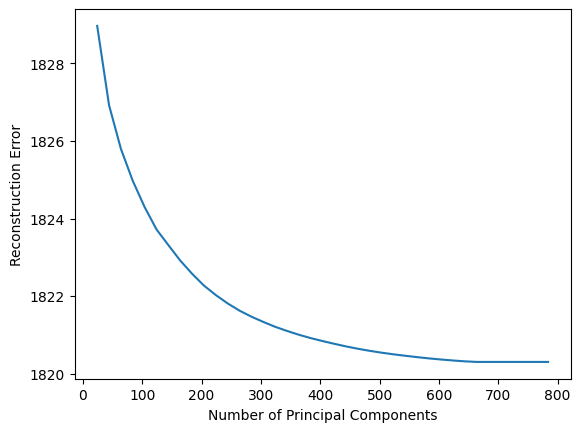

In [ ]:
from matplotlib import pyplot as plt
plt.plot(X_axis,Y_axis)
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction Error')
plt.show()
#Reconstruction Error decreases as the number of Principal Components increases. Also the magnitude of this error will be different for different runs of the program.

Reconstruction error can be used as a measure of how well the chosen number of principal components captures the variability in the data.
Typically, as you increase the number of principal components (k), the reconstruction error decreases, but there's a trade-off between dimensionality reduction and the amount of information retained from the original data.